1. Cleansing Data

In [2]:
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser
import numpy as np

In [3]:
df = pd.read_csv('retail_salesdata_merge.csv')

,Unnamed: 0,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,0,268408,02-01-1970,M,4.0,87243835584,2014-01-13,2014,1,Monday,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,1,275152,16-01-1970,M,4.0,73109425404,2011-03-25,2011,3,Friday,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,2,275034,18-01-1970,F,4.0,64777271023,2011-05-23,2011,5,Monday,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,3,270829,22-01-1970,F,8.0,87174343938,2013-09-12,2013,9,Thursday,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,4,267657,29-01-1970,F,7.0,76242744953,2013-05-23,2013,5,Thursday,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,23035,267812,04-12-1992,F,1.0,63540378797,2012-10-10,2012,10,Wednesday,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23036,23036,274618,09-12-1992,F,7.0,71793203305,2013-08-17,2013,8,Saturday,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23037,23037,268097,15-12-1992,F,7.0,91217108818,2012-01-02,2012,1,Monday,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23038,23038,268097,15-12-1992,F,7.0,90114483354,2011-01-31,2011,1,Monday,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction


In [4]:
now = datetime.now()
df['today'] = now
snapshot = df['today'].max()

In [5]:
df["tran_date"] = pd.to_datetime(df["tran_date"])

In [6]:
customer_group = df.groupby("customer_Id") 
recency = (snapshot - customer_group["tran_date"].max()) 
frequency = customer_group["transaction_id"].nunique() 
monetary = customer_group["total_amt"].sum()
rfm = rfm = pd.DataFrame() 
rfm["Recency"] = recency.dt.days 
rfm["Frequency"] = frequency
rfm["Monetary"] = monetary


,Recency,Frequency,Monetary
customer_Id,,,
266783,3644,4,3113.890
266784,4002,3,5694.065
266785,3845,7,21613.800
266788,3553,4,6092.970
266794,3188,11,27981.915
...,...,...,...
275257,3821,4,12574.900
275261,3711,3,442.000
275262,4195,2,5078.580


In [7]:
recency_scores = [5, 4, 3, 2, 1] 
frequency_scores = [1, 2, 3, 4, 5] 
monetary_scores = [1, 2, 3, 4, 5]

# Calculate RFM scores
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=5, labels=recency_scores)
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=5, labels=frequency_scores)
rfm['M_Score'] =  pd.cut(rfm['Monetary'], bins=5, labels=monetary_scores)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
customer_Id,,,,,,
266783,3644,4,3113.890,4,2,2
266784,4002,3,5694.065,3,1,2
266785,3845,7,21613.800,3,3,4
266788,3553,4,6092.970,4,2,2
266794,3188,11,27981.915,5,5,4
...,...,...,...,...,...,...
275257,3821,4,12574.900,3,2,3
275261,3711,3,442.000,4,1,1
275262,4195,2,5078.580,2,1,2


In [8]:
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']


In [9]:
rfm["Customer_segment"] = np.where(rfm['RFM_Score'] >= 12, "Top Customers",(np.where(rfm['RFM_Score'] >= 9,"High value Customer",
                                        (np.where(rfm['RFM_Score'] >= 7,"Medium Value Customer",np.where(rfm['RFM_Score'] >= 5,
                                                                                                        'Low Value Customers', 'Lost Customers'))))))

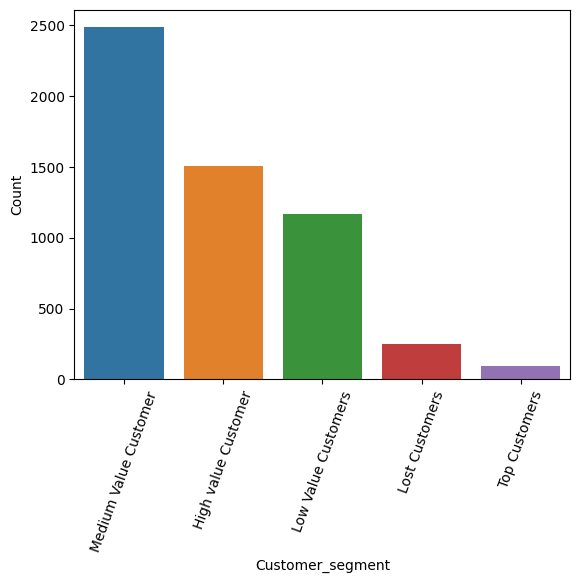

In [12]:
segment_counts = rfm['Customer_segment'].value_counts().reset_index()
segment_counts.columns = ['Customer_segment', 'Count']

ax = sns.barplot(segment_counts, x='Customer_segment', y='Count')
ax.tick_params(axis='x', rotation=70)
